# PROJECT TITLE 

Indian Startup Funding Ecosystem

### Hypothesis ###

 Hypothesis : Sector and Funding Amount

* Null Hypothesis (H0): The sector in which a startup operates has no significant impact on the amount of funding it receives.   
*  Alternative Hypothesis (H1): The sector in which a startup operates has a significant impact on the amount of funding it receives.   

### Research Questions ###

##### 1. Which Industry received the highest amount of funding?
 ##### 2. Which location recorded the highest amount of funding received?
 ##### 3. How many companies received funding in each year?
 ##### 4. What is the total amount  funding received each year
 ##### 5. which company recieved the most funds

# Loading Datasets from Various Sources

### First data Set 



#### The data for 2020 and 2021 is stored in a database. I will access this data remotely.

In [2]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings
 
import pyodbc
from dotenv import dotenv_values 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from re import RegexFlag                               # Libraries importation 
from scipy import stats
import statistics as stats
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
 

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")
 

In [4]:
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [5]:
connection = pyodbc.connect(connection_string)

### Load  the data of year 2020

In [6]:
query = "Select * from dbo.LP1_startup_funding2020"
year_2020 = pd.read_sql(query, connection)
year_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None


#### Load  the data of year 2021

In [7]:
query2 = "Select * from dbo.LP1_startup_funding2021"
year_2021 = pd.read_sql(query2, connection)

year_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


### Second Data Set (Data for 2019)

In [8]:
data_2019=pd.read_csv('startup_funding2019.csv') # Loading Data from OneDrive in CSV Format
data_2019.head(3)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding


### Third Data Set  (data for 2018)  

In [9]:
data_2018 = pd.read_csv("startup_funding2018.csv")            # Loading data from OneDrive, which is stored in CSV files.
data_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


### Data Cleaning/Preparation

### Inspecting the Data of 2018

In [10]:
data_2018.head(3)

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


In [11]:
data_2018.shape            # Displaying the shape of the 'data_2018' DataFrame.

(526, 6)

In [12]:
data_2018.info()      
# Displaying information about the 'data_2018' DataFrame, including data types, non-null counts, and memory usage.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


### check for null values 

In [13]:
data_2018.isnull().sum()                   
# Checking for null values in the 'data_2018' DataFrame. No null values were found.


Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

#### checking for duplicated rows and dropping if any

In [14]:
data_2018[data_2018.duplicated(keep=False)]

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
348,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."


In [15]:
data_2018.drop_duplicates(inplace=True)              # Removed duplicate rows from the 'data_2018' DataFrame in-place.

#### Rename the columns 

In [16]:
data_2018.rename(columns={'Amount': 'Amount($)', 'Location': 'HeadQuarter', 'Round/Series': 'Stage'}, inplace=True)  
# Renamed specific columns in 'data_2018' to align with other dataset column names.



#### Add a year tag to the data=2018

In [17]:
data_2018['Funding Year']=2018 
data_2018.head(2)          
# Adding a 'Funding Year' tag to the 'data_2018' dataset in preparation for concatenation with other datasets.
# I did this because I will be combining datasets, and having a year tag helps maintain clarity.

,Company Name,Industry,Stage,Amount($),HeadQuarter,About Company,Funding Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018


### Inspecting the Data of 2019

In [18]:
data_2019.head(2)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C


In [19]:
data_2019.shape                   # Displaying the shape of the 'data_2018' DataFrame.

(89, 9)

In [20]:
               
# Displaying information about the 'data_2019' DataFrame, including data types, non-null counts, and memory usage.
data_2019.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


##### checking for Null Values

In [21]:
data_2019.isna().sum()             



Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

#### checking for duplicated rows

In [22]:
data_2019[data_2019.duplicated(keep=False)]                    
# Checking for duplicate rows in the 'data_2019' DataFrame. No duplicate rows were found.



,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage


#### Rename the columns

In [23]:
data_2019.rename(columns={'Company/Brand': 'Company Name', 'What it does': 'About Company', 'Sector':'Industry'}, inplace=True)
# Renamed specific columns in 'data_2019' to align with other dataset column names.

#### Add a year tag to the data= 2019

In [24]:
data_2019['Funding Year']=2019     # Adding a 'Funding Year' tag to the 'data_2019' dataset in preparation for concatenation with other datasets.
# I did this because I will be combining datasets, and having a year tag helps maintain clarity.
#### Add a year tag to the data= 2019

## Concatinating 2018 and 2019 data 

In [25]:
data_18_19 = pd.concat([data_2018, data_2019], axis=0).reset_index(drop=True)
data_18_19.head(2)

,Company Name,Industry,Stage,Amount($),HeadQuarter,About Company,Funding Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN


In [26]:
data_18_19.shape

(614, 10)

  ### Inspecting the Data of 2020

In [27]:

year_2020.to_csv('startup_funding2020.csv', index=False)
# Saving the 'year_2020' DataFrame as a CSV file for future concatenation.
# The CSV file is named 'startup_funding2020.csv', and the index column is excluded.



In [28]:
data_2020=pd.read_csv('startup_funding2020.csv')
data_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,NaN


In [29]:
data_2020.shape # Displaying the shape of the 'data_2020' DataFrame.


(1055, 10)

In [30]:
data_2020.info()    # Displaying information about the 'data_2020' DataFrame, including data types, non-null counts, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


### Dropping  column10 column because is not useful in anyway while analysing the data

In [31]:
data_2020 =data_2020.drop('column10',axis=1)
data_2020.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed


 #### checking for duplicated rows and dropping if any

In [32]:
data_2020[data_2020.duplicated(keep=False)]


,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,NaN
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,NaN
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,NaN
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,NaN


In [33]:
data_2020.drop_duplicates(inplace=True)              # Removed duplicate rows from the 'data_2020' DataFrame in-place.

#### Rename the columns 

In [34]:
data_2020.rename(columns={'Company_Brand': 'Company Name', 'Sector': 'Industry', 'What_it_does':'About Company', 'Amount':'Amount($)'},inplace=True)
data_2020.head()
# Renamed specific columns in 'data_2020' to align with other dataset column names.

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,NaN
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,NaN


#### Add a year tag to the data= 2020

In [35]:
data_2020['Funding Year']=2020     
 # Adding a 'Funding Year' tag to the 'data_2020' dataset in preparation for concatenation with other datasets.
# I did this because I will be combining datasets, and having a year tag helps maintain clarity.

In [36]:
data_2020.head(2)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020



 ### Inspecting the Data of 2021

In [37]:
year_2021.to_csv('startup_funding2020.csv', index=False)
# Saving the 'year_2021' DataFrame as a CSV file for future concatenation.
# The CSV file is named 'startup_funding2020.csv', and the index column is excluded.


In [38]:
data_2021 = pd.read_csv('startup_funding2021.csv')
data_2021.head(2)

,Unnamed: 0,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN


In [39]:
data_2021.info()      # Displaying information about the 'data_2021' DataFrame, including data types, non-null counts, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1209 non-null   int64  
 1   Company_Brand  1209 non-null   object 
 2   Founded        1208 non-null   float64
 3   HeadQuarter    1208 non-null   object 
 4   Sector         1209 non-null   object 
 5   What_it_does   1209 non-null   object 
 6   Founders       1205 non-null   object 
 7   Investor       1147 non-null   object 
 8   Amount         1206 non-null   object 
 9   Stage          781 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


##### checking for Null Values

In [40]:
data_2021.isnull().sum()

Unnamed: 0         0
Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

### Dropping the "unnamed" column because it's not in any way useful

In [41]:
data_2021 =data_2021.drop('Unnamed: 0',axis=1)
data_2021.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN


#### Rename the columns 

In [42]:
data_2021.rename(columns={'Company_Brand': 'Company Name', 'Sector': 'Industry', 'What_it_does':'About Company', 'Amount':'Amount($)'},inplace=True)

# Renamed specific columns in 'data_2021' to align with other dataset column names.

 
 #### Add a year tag to the data= 2021

In [43]:
data_2021['Funding Year']=2021          # Adding a 'Funding Year' tag to the 'data_2021' dataset in preparation for concatenation with other datasets.
# I did this because I will be combining datasets, and having a year tag helps maintain clarity.

In [44]:
data_2021.head(2)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",NaN,2021


In [45]:
data_2020.head(2)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020


### Concatinating 2020 and 2021 dataset

In [46]:
data_20_21 = pd.concat([data_2020, data_2021])
data_20_21.head(3)

,Company Name,Founded,HeadQuarter,Industry,About Company,Founders,Investor,Amount($),Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,NaN,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020


In [47]:
data_20_21.shape            # Displaying the shape of the 'data_2018' DataFrame.

(2261, 10)

## Concatinating all datasets 

In [48]:
data=pd.concat([data_18_19, data_20_21], axis=0).reset_index(drop=True)
data.head(2)

,Company Name,Industry,Stage,Amount($),HeadQuarter,About Company,Funding Year,Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018,NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018,NaN,NaN,NaN


In [49]:
data.shape       # Displaying the shape of the 'data' DataFrame.

(2875, 10)

#### The final new combined dataset (data) is what we are going to use hereafter. 
#### Dropping the columns that we are not going to use for our analysis 

In [50]:
data = data.drop(columns={'About Company','Founders', 'Investor'}, axis=1)
data.head(2)

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India",2018,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,NaN


Inspecting the columns

In [51]:
#Industry
data['Industry'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [52]:
# maintianing first word before comma in the industry column
data['Industry'] = data['Industry'].apply(str)
data['Industry'] = data['Industry'].str.split(',').str[0]
data['Industry'] = data['Industry'].replace("'","",regex=True)

In [53]:
data['Industry']= data['Industry'].replace('—', 'unknown')

In [54]:
data.loc[data["Industry"] == 'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded
2766,Sochcast,Sochcast is an Audio experiences company that ...,NaN,NaN,Online Media\t#REF!,2021,2020.0


In [55]:
values_to_drop= ['Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']
data = data[~data['Industry'].isin(values_to_drop)]

In [56]:
data['Industry'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mo

Regrouping the industry column values into broader groups

    1:Technology & Software: Including categories like AI startup, IoT startup, SaaS startup, Tech company, etc.
    2:Finance & Banking: Encompassing Finance company, Renewable player, Blockchain startup, etc.
    3:E-Commerce & Marketplace: Covering Crowdfunding, Delivery Service, B2B Supply Chain, Retail startup, etc.
    4:Healthcare & Wellness: Encompassing Biopharma, Child Care, HealthTech, FemTech, etc.
    5:Manufacturing & Industrial: Including Battery, Electric Vehicle, Solar Monitoring Company, etc.
    6:Media & Entertainment: Covering Games, Video sharing platform, Video streaming platform, Advertisement, etc.
    7:Consulting & Services: Including HR tech, Legal tech, Marketing company, Supply chain platform, etc.
    8:Automotive & Transportation: Encompassing automotive_transportation, Bike Rental, etc.
    9:Real Estate & Property: Covering Real Estate, Co-working Startup, Real estate, etc.
    10:Other Categories: For industries that may not directly fit into the above groups.

In [57]:
# Function to categorize words based on substrings

def categorize_industry(industry):
    industry = industry.lower()
    if 'tech' in industry or 'software' in industry or 'internet' in industry or 'information technology' in industry:
        return 'Technology'
    elif 'finance' in industry or 'banking' in industry or 'account' in industry or 'insurance' in industry or 'credit' in industry or 'wealth management' in industry:
        return 'Finance $ Banking'
    elif 'health' in industry or 'medical' in industry or 'biotechnology' in industry or 'healthcare' in industry or 'well' in industry:
        return 'Healthcare'
    elif 'food' in industry or 'beverage' in industry or 'restaurant' in industry or 'agriculture' in industry:
        return 'Food & Agriculture'
    elif 'auto' in industry or 'transport' in industry or 'logistic' in industry:
        return 'Autommotive $ Transportation'
    elif 'estate' in industry or 'property' in industry:
        return 'Real Estate $ Property'
    elif 'consult' in industry or 'services' in industry:
        return 'Consulting & Services'
    elif 'commerce' in industry or 'market' in industry:
        return 'E-Commerce & Marketplace'
    else:
        return 'Other'
# Apply the categorization function to the 'industry' column
data['category'] = data['Industry'].apply(categorize_industry)

# Display the updated DataFrame
data.head(10)

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Seed,250000,"Bangalore, Karnataka, India",2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Seed,"₹40,000,000","Mumbai, Maharashtra, India",2018,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A,"₹65,000,000","Gurgaon, Haryana, India",2018,NaN,Finance $ Banking
3,PayMe India,Financial Services,Angel,2000000,"Noida, Uttar Pradesh, India",2018,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Seed,—,"Hyderabad, Andhra Pradesh, India",2018,NaN,E-Commerce & Marketplace
5,Hasura,Cloud Infrastructure,Seed,1600000,"Bengaluru, Karnataka, India",2018,NaN,Other
6,Tripshelf,Internet,Seed,"₹16,000,000","Kalkaji, Delhi, India",2018,NaN,Technology
7,Hyperdata.IO,Market Research,Angel,"₹50,000,000","Hyderabad, Andhra Pradesh, India",2018,NaN,E-Commerce & Marketplace
8,Freightwalla,Information Services,Seed,—,"Mumbai, Maharashtra, India",2018,NaN,Consulting & Services
9,Microchip Payments,Mobile Payments,Seed,—,"Bangalore, Karnataka, India",2018,NaN,Other


In [58]:
#HeadQuarter
data['HeadQuarter'].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

In [59]:
# maintianing first word before comma in the HeadQuarter column
data['HeadQuarter'] = data['HeadQuarter'].apply(str)
data['HeadQuarter'] = data['HeadQuarter'].str.split(',').str[0]
data['HeadQuarter'] = data['HeadQuarter'].replace("'","",regex=True)

In [60]:
data['HeadQuarter'].replace('Gurugram\t#REF!','Gurugram',inplace =True, regex=True)

In [61]:
data.loc[data['HeadQuarter']== 'Food & Beverages']

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
1907,MasterChow,Hauz Khas,Seed,$461000,Food & Beverages,2021,2020.0,Other
1921,MasterChow,Hauz Khas,Seed,$461000,Food & Beverages,2021,2020.0,Other


In [62]:
data.loc[data["HeadQuarter"] == 'Computer Games']

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
1764,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,2021,2020.0,Other
1777,FanPlay,Computer Games,$1200000,Upsparks,Computer Games,2021,2020.0,Other


In [63]:
values_to_drop = ['Small Towns', 'Computer Games', 'Food & Beverages', 'Pharmaceuticals\t#REF! ,Online Media\t#REF!', 'Information Technology & Services']

# Drop rows with specified values in the 'headquarters' column
data = data[~data['HeadQuarter'].isin(values_to_drop)]

In [64]:
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'nan',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 'Irv

In [65]:
#Stage
data['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round', nan, 'Fresh funding',
       'Pre series A', 'Series G', 'Post series A', 'Seed funding',
       'Seed fund', 'Series F', 'Series B+', 'Seed round', 'Pre-series A',
       'Pre-seed', 'Pre-series', 'Debt', 'Pre-series C', 'Pre-series B',
       'Bridge', 'Series B2', 'Pre- series A', 'Edge', 'Pre-Series B',
       'Seed A', 'Series A-1', 'Seed Funding', 'Pre-seed Round',
       'Seed Round & Series A', 'Pre Series A', 'Pre seed Round',
       'Angel Round', 'Pre series A1', 'Series E2', 'Seed Round',
       'Bridge Round', 'Pre seed

Assumptions made when dealing with the stage column 
-Regrouping the stages into 5 groups 

Early Stage: Pre-Seed,Seed,Pre series A,Seed funding,Seed fund,Seed round,Pre-series A,Pre-seed Round, Pre seed Round, Pre series A1,Pre-series C,Series A-1

Angel and Grants:Angel,Grant

Series A to Series H: Series A,Series B,Series C,Series D,Series E,Series F,Series G,Series H,Series B+,Post series A,Series D1

Later Stage:Venture -,Private Equity,Debt Financing,Post-IPO Debt,Post-IPO Equity,Corporate Round,Non-equity Assistance,Funding Round,Fresh funding,Secondary Market, PE
    
Unknown = Undisclosed,Venture - Series Unknown, nan, .startswith https,


In [66]:


def group_funding_stages(stage):
    if stage in ['Pre-Seed', 'Seed','Early seed','Series I','Seed Round', 'Pre series A', 'Seed funding', 'Seed fund', 'Seed round', 'Pre-series A','Pre-series A1',
                 'Pre-seed Round', 'Pre seed Round', 'Pre series A1', 'Pre-series C', 'Series A-1','Pre-seed', 'Pre-series', 'Pre- series A', 'Pre-Series B', 'Seed A', 'Seed Funding', 'Seed Round & Series A',
                'Pre Series A','Pre seed round','Pre series B', 'Pre series C', 'Seed Investment', 'Seed+','Pre-series B']:
        return 'Early Stage'
    
    elif stage in ['Angel', 'Grant', 'Angel Round']:
        return 'Angel and Grants'
    
    elif stage in ['Series A','Seies A', 'Series A2', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H',
                   'Series B+', 'Post series A', 'Series D1','Series B2', 'Series E2', 'Series C, D', 'Series F2', 'Series F1', 'Series A+', 'Series B3']:
        return 'Series A to Series H'
    
    elif stage in ['Venture -', 'Private Equity','Debt' ,'Debt Financing', 'Post-IPO Debt', 'Post-IPO Equity',
                   'Corporate Round', 'Non-equity Assistance', 'Funding Round', 'Fresh funding', 'Secondary Market',
                   'PE','Bridge', 'Edge', 'Bridge Round', 'Mid series']:
        return 'Later Stage'
    
    elif stage in ['Undisclosed','Venture - Series Unknown','https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593']:
        return 'unknown'

    else:
        return stage

# Apply the function to the 'Stage' column
data['Stage'] = data['Stage'].apply(group_funding_stages)

# Display the updated DataFrame
data.head()


,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000,Bangalore,2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,"₹40,000,000",Mumbai,2018,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,"₹65,000,000",Gurgaon,2018,NaN,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000,Noida,2018,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,—,Hyderabad,2018,NaN,E-Commerce & Marketplace


In [67]:
data["Stage"].unique()

array(['Early Stage', 'Series A to Series H', 'Angel and Grants',
       'Later Stage', 'unknown', nan, '$300000', '$6000000', '$1000000'],
      dtype=object)

We have 3 'amount' values in the stage column so instead of changing them to null values, we checked the rows where the values were 

In [68]:
data[data['Stage']=='$6000000']

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2340,MYRE Capital,Commercial Real Estate,$6000000,NaN,Mumbai,2021,2020.0,Real Estate $ Property


Stage and amount values are interchanged in this particular row, and the other 2 ,so we move the value to the amount column and replace the stage with an unknown value.

In [69]:
data.loc[data["Company Name"] == "MYRE Capital", ["Amount($)", "Stage"]] = ["6000000",'unknown']
data.loc[data["Company Name"] == "MYRE Capital"]

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2340,MYRE Capital,Commercial Real Estate,unknown,6000000,Mumbai,2021,2020.0,Real Estate $ Property


In [70]:
data[data['Stage']=='$300000']



,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2204,Little Leap,EdTech,$300000,ah! Ventures,New Delhi,2021,2020.0,Technology
2217,BHyve,Human Resources,$300000,"ITO Angel Network, LetsVenture",Mumbai,2021,2020.0,Other


In [71]:
data.loc[data["Company Name"] == "Little Leap", ["Amount($)", "Stage"]] = ["$300000",'unknown']
data.loc[data["Company Name"] == "Little Leap"]

data.loc[data["Company Name"] == "BHyve", ["Amount($)", "Stage"]] = ["$300000",'unknown']
data.loc[data["Company Name"] == "BHyve"]

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2217,BHyve,Human Resources,unknown,$300000,Mumbai,2021,2020.0,Other


In [72]:

data[data['Stage']=='$1000000']

data.loc[data["Company Name"] == "Saarthi Pedagogy", ["Amount($)", "Stage"]] = ["$1000000",'unknown']
data.loc[data["Company Name"] == "Saarthi Pedagogy"]


,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
2343,Saarthi Pedagogy,EdTech,unknown,$1000000,Ahmadabad,2021,2015.0,Technology


 Removing the currency signs, replacing the empty values '-' with 0.Assuming all the other values are in dollars except the ones that have been recorded in 'rupees' (Convert the values in rupees to dollars and the empty values to 0 ) now all the values are in dollars. Then converting the amount column to a float (it is stored as an object)

In [73]:
#Amount
def convert_to_dollars(value, conversion_rate):
    try:
        if isinstance(value, str):
            if '₹' in value:
                # Extract the numeric part and convert to float
                amount_in_rupees = float(value.replace('₹', '').replace(',', ''))
                
                # Convert to dollars using the conversion rate
                amount_in_dollars = amount_in_rupees * conversion_rate
                return amount_in_dollars
            
            elif '$' in value:
                # If already in dollars, remove commas and return as float
                return float(value.replace(',', '').replace('$', ''))
            elif '' in value:
                return value
        
        # If it's not a string with currency symbols, return the original value
        return value
    except ValueError:
        
        return None

# Assuming 'data' is a DataFrame with a column 'Amount($)' to convert
conversion_rate = 0.0146

# Apply the function to the 'Amount($)' column
data['Amount($)'] = data['Amount($)'].apply(lambda x: convert_to_dollars(x, conversion_rate))

# Display the updated DataFrame
data.head()


,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000,Bangalore,2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,584000.0,Mumbai,2018,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,949000.0,Gurgaon,2018,NaN,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000,Noida,2018,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,—,Hyderabad,2018,NaN,E-Commerce & Marketplace


In [74]:


data["Amount($)"] = data["Amount($)"].apply(str)




data["Amount($)"].replace("—", 0, inplace = True, regex=True)
data["Amount($)"].replace("Undisclosed", 0, inplace = True, regex=True)
data["Amount($)"].replace("$undisclosed", 0, inplace = True, regex=True)
data["Amount($)"].replace("undisclosed",0,inplace = True, regex=True)

data["Amount($)"].replace("Series C", 0,inplace = True, regex=True)
data["Amount($)"].replace("Seed",0,inplace = True, regex=True)
data["Amount($)"].replace("ah! Ventures",0,inplace = True, regex=True)
data["Amount($)"].replace("Pre-series A",0,inplace = True, regex=True)
data["Amount($)"].replace("ITO Angel Network LetsVenture",0,inplace = True, regex=True)



data["Amount($)"] = data["Amount($)"].apply(lambda x: (str(x)))


data.head()

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000,Bangalore,2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,584000.0,Mumbai,2018,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,949000.0,Gurgaon,2018,NaN,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000,Noida,2018,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,0,Hyderabad,2018,NaN,E-Commerce & Marketplace


In [75]:
# Drop rows with zero in the "Amount($)" column
data = data[data["Amount($)"] != 0]

# Reset index after dropping rows
data = data.reset_index(drop=True)

# Print the resulting DataFrame


In [76]:
data.head(20)

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,Founded,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000,Bangalore,2018,NaN,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,584000.0,Mumbai,2018,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,949000.0,Gurgaon,2018,NaN,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000,Noida,2018,NaN,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,0,Hyderabad,2018,NaN,E-Commerce & Marketplace
5,Hasura,Cloud Infrastructure,Early Stage,1600000,Bengaluru,2018,NaN,Other
6,Tripshelf,Internet,Early Stage,233600.0,Kalkaji,2018,NaN,Technology
7,Hyperdata.IO,Market Research,Angel and Grants,730000.0,Hyderabad,2018,NaN,E-Commerce & Marketplace
8,Freightwalla,Information Services,Early Stage,0,Mumbai,2018,NaN,Consulting & Services
9,Microchip Payments,Mobile Payments,Early Stage,0,Bangalore,2018,NaN,Other


In [131]:
data['Amount($)'] = pd.to_numeric(data['Amount($)'], errors='coerce').astype('float')

# Display the cleaned DataFrame
data.head(9)


,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000.00,Bangalore,2018,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,584000.00,Mumbai,2018,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,949000.00,Gurgaon,2018,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000.00,Noida,2018,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,0.00,Hyderabad,2018,E-Commerce & Marketplace
5,Hasura,Cloud Infrastructure,Early Stage,1600000.00,Bengaluru,2018,Other
6,Tripshelf,Internet,Early Stage,233600.00,Kalkaji,2018,Technology
7,Hyperdata.IO,Market Research,Angel and Grants,730000.00,Hyderabad,2018,E-Commerce & Marketplace
8,Freightwalla,Information Services,Early Stage,0.00,Mumbai,2018,Consulting & Services


In [78]:
data['Amount($)'].isnull().sum()

351

In [79]:
data['Amount($)'].unique()

array([2.5000000e+05, 5.8400000e+05, 9.4900000e+05, 2.0000000e+06,
       0.0000000e+00, 1.6000000e+06, 2.3360000e+05, 7.3000000e+05,
       1.4600000e+06, 1.5000000e+05, 1.1000000e+06, 7.3000000e+03,
       6.0000000e+06, 6.5000000e+05, 5.1100000e+05, 9.3440000e+05,
       2.9200000e+05, 1.0000000e+06, 5.0000000e+06, 4.0000000e+06,
       4.3800000e+05, 2.8000000e+06, 1.7000000e+06, 1.3000000e+06,
       7.3000000e+04, 1.8250000e+05, 2.1900000e+05, 5.0000000e+05,
       1.5184000e+06, 6.5700000e+05, 1.3400000e+07, 3.6500000e+05,
       3.8544000e+05, 1.1680000e+05, 8.7600000e+02, 9.0000000e+06,
       1.0000000e+05, 2.0000000e+04, 1.2000000e+05, 4.9640000e+05,
       4.9932000e+06, 1.4314500e+05, 8.7600000e+06, 7.4200000e+08,
       1.4600000e+07, 2.9200000e+07, 3.9800000e+06, 1.0000000e+04,
       1.4600000e+03, 3.6500000e+06, 1.0000000e+09, 7.0000000e+06,
       3.5000000e+07, 8.0300000e+06, 2.8500000e+07, 3.5040000e+06,
       1.7520000e+06, 2.4000000e+06, 3.0000000e+07, 3.6500000e

In [80]:
data['Amount($)'] = data['Amount($)'].apply(lambda x: f'{x:.2f}')

In [81]:
data['Amount($)'].unique()

array(['250000.00', '584000.00', '949000.00', '2000000.00', '0.00',
       '1600000.00', '233600.00', '730000.00', '1460000.00', '150000.00',
       '1100000.00', '7300.00', '6000000.00', '650000.00', '511000.00',
       '934400.00', '292000.00', '1000000.00', '5000000.00', '4000000.00',
       '438000.00', '2800000.00', '1700000.00', '1300000.00', '73000.00',
       '182500.00', '219000.00', '500000.00', '1518400.00', '657000.00',
       '13400000.00', '365000.00', '385440.00', '116800.00', '876.00',
       '9000000.00', '100000.00', '20000.00', '120000.00', '496400.00',
       '4993200.00', '143145.00', '8760000.00', '742000000.00',
       '14600000.00', '29200000.00', '3980000.00', '10000.00', '1460.00',
       '3650000.00', '1000000000.00', '7000000.00', '35000000.00',
       '8030000.00', '28500000.00', '3504000.00', '1752000.00',
       '2400000.00', '30000000.00', '36500000.00', '23000000.00',
       '11000000.00', '642400.00', '3240000.00', '876000.00',
       '540000000.00', '

In [82]:
data['Amount($)'] = data['Amount($)'].astype(float)

In [83]:
data['Amount($)'].dtype

dtype('float64')

In [84]:
#Founded 
data['Founded'].unique()

array([  nan, 2014., 2004., 2013., 2010., 2018., 2019., 2017., 2011.,
       2015., 2016., 2012., 2008., 2020., 1998., 2007., 1982., 2009.,
       1995., 2006., 1978., 1999., 1994., 2005., 1973., 2002., 2001.,
       2021., 1993., 1989., 2000., 2003., 1991., 1984., 1963.])

In [85]:
data.drop(columns=['Founded'], inplace=True)

In [86]:
data.head(12)

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000.0,Bangalore,2018,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,584000.0,Mumbai,2018,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,949000.0,Gurgaon,2018,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000.0,Noida,2018,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,0.0,Hyderabad,2018,E-Commerce & Marketplace
5,Hasura,Cloud Infrastructure,Early Stage,1600000.0,Bengaluru,2018,Other
6,Tripshelf,Internet,Early Stage,233600.0,Kalkaji,2018,Technology
7,Hyperdata.IO,Market Research,Angel and Grants,730000.0,Hyderabad,2018,E-Commerce & Marketplace
8,Freightwalla,Information Services,Early Stage,0.0,Mumbai,2018,Consulting & Services
9,Microchip Payments,Mobile Payments,Early Stage,0.0,Bangalore,2018,Other


In [87]:
#Company Name
data['Company Name']

0       TheCollegeFever
1       Happy Cow Dairy
2            MyLoanCare
3           PayMe India
4              Eunimart
             ...       
2863           Gigforce
2864             Vahdam
2865       Leap Finance
2866       CollegeDekho
2867             WeRize
Name: Company Name, Length: 2868, dtype: object

Check for duplicated rows and drop if any

In [88]:
data[data.duplicated(keep=False)]

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,category
827,Genius Teacher,Edtech,NaN,2000000.0,Mumbai,2020,Technology
845,Genius Teacher,Edtech,NaN,2000000.0,Mumbai,2020,Technology
1382,Capital Float,Fintech,NaN,15000000.0,Bangalore,2020,Technology
1513,Yolo,Transport,Early Stage,600000.0,Gurugram,2020,Autommotive $ Transportation
1546,Byju,Edtech,NaN,200000000.0,nan,2020,Technology
1575,Yolo,Transport,Early Stage,600000.0,Gurugram,2020,Autommotive $ Transportation
1625,Capital Float,Fintech,NaN,15000000.0,Bangalore,2020,Technology
1646,Byju,Edtech,NaN,200000000.0,nan,2020,Technology
1759,Curefoods,Food & Beverages,NaN,13000000.0,Bangalore,2021,Food & Agriculture
1761,Bewakoof,Apparel & Fashion,NaN,8000000.0,Mumbai,2021,Other


In [89]:
data.drop_duplicates(inplace=True)

In [90]:
data.shape

(2844, 7)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2844 entries, 0 to 2867
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  2844 non-null   object 
 1   Industry      2844 non-null   object 
 2   Stage         1920 non-null   object 
 3   Amount($)     2494 non-null   float64
 4   HeadQuarter   2844 non-null   object 
 5   Funding Year  2844 non-null   int64  
 6   category      2844 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 177.8+ KB


In [92]:
data.isnull().sum()

Company Name      0
Industry          0
Stage           924
Amount($)       350
HeadQuarter       0
Funding Year      0
category          0
dtype: int64

Dealing with the null values

In [93]:
data['Stage'].fillna('unknown', inplace=True)

In [94]:
data['Amount($)'].fillna(data['Amount($)'].mean(), inplace=True)

In [95]:
data['HeadQuarter'].fillna('unknown', inplace=True)

In [96]:
data['HeadQuarter'].replace('nan' , 'unknown' , inplace= True)

In [97]:
data['HeadQuarter'].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow', 'unknown',
       'Telangana', 'Gurugram', 'Surat', 'Uttar pradesh', 'Rajasthan',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'San Francisco Bay Area',
       'Bangaldesh', 'London', 'Milano', 'Palmwoods', 'France',
       'Samastipur', 

In [98]:

data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company Name,2844,2210,BharatPe,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,2844,592,FinTech,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2844,5,Early Stage,1072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),2844.0,NaN,NaN,NaN,111909478.741379,3104287317.689676,0.0,728750.0,3565000.0,29724120.0,150000000000.0
HeadQuarter,2844,127,Bangalore,856,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funding Year,2844.0,NaN,NaN,NaN,2020.01512,1.088802,2018.0,2020.0,2020.0,2021.0,2021.0
category,2844,9,Other,1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [100]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Amount($),2844.00,111909478.74,3104287317.69,0.00,728750.00,3565000.00,29724120.00,150000000000.00
Funding Year,2844.00,2020.02,1.09,2018.00,2020.00,2020.00,2021.00,2021.00


In [101]:
data.isnull().sum()

Company Name    0
Industry        0
Stage           0
Amount($)       0
HeadQuarter     0
Funding Year    0
category        0
dtype: int64

In [102]:
import matplotlib.pyplot as plt


## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

### 1. Which Industry received the highest amount of funding?

In [103]:

industry=data.groupby('Industry').sum(numeric_only=True).reset_index()              #Grouping the data by 'Industry' and calculating the sum of numeric values.
industry

,Industry,Amount($),Funding Year
0,3D Printing,0.00,2018
1,AI,675893893.71,40398
2,AI & Data science,8000000.00,2020
3,AI & Debt,111909478.74,2020
4,AI & Deep learning,111909478.74,2020
...,...,...,...
587,eMobility,1000000.00,2020
588,eSports,584000.00,2018
589,nan,384487557.48,36355
590,sports,226218957.48,8084


In [104]:
# sort amount in decesnding order
industry.sort_values(['Amount($)'], ascending = False, inplace=True)
#industry['Amount($)']=industry['Amount($)'].apply(lambda x: float('{:.2f}'.format(x)))

In [105]:

top_10_industry=industry.head(10)
top_10_industry                               # Extracting the top 10 industries with the highest summed values using the head() function.

,Industry,Amount($),Funding Year
266,FinTech,155534152181.12,347555
479,Retail,70653489478.74,50513
225,EdTech,5629965638.60,297030
228,Edtech,3965995347.34,145433
214,E-commerce,3438599393.71,147494
535,Tech company,3246518957.48,20200
55,Automotive,2498026636.97,105035
270,Fintech,2471801602.38,169675
269,Financial Services,2416530936.22,173727
424,Multinational conglomerate company,2200000000.00,2020


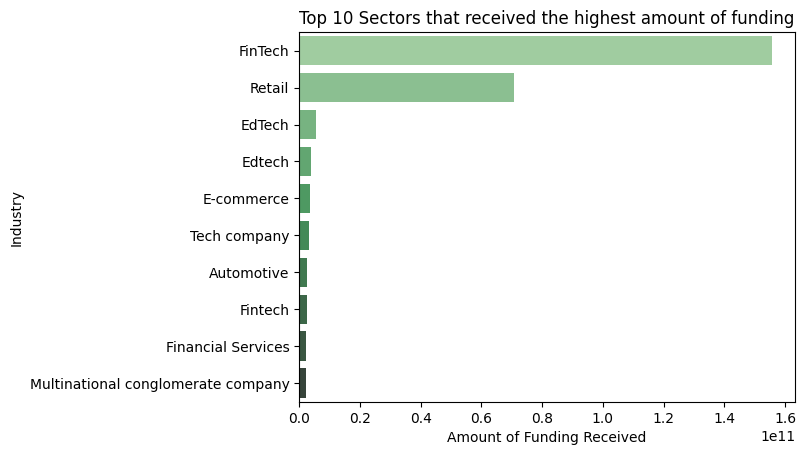

In [106]:
plt.title('Top 10 Sectors that received the highest amount of funding')
sns.barplot(y=top_10_industry['Industry'],x=top_10_industry['Amount($)'],palette='Greens_d')                 # Plotting a bar chart to visualize the top 10 sectors that received the highest amount of funding.
plt.xlabel('Amount of Funding Received')
plt.ylabel('Industry')
plt.show()

### 2. Which location recorded the highest amount of funding received?

In [107]:
HQ=data.groupby('HeadQuarter').sum(numeric_only=True).reset_index()

In [108]:
#sort amount in descending order
HQ.sort_values(['Amount($)'], ascending = False, inplace=True)
HQ

,HeadQuarter,Amount($),Funding Year
71,Mumbai,236950345509.52,943338
9,Bangalore,35379369671.84,1729316
40,Gurugram,8457277947.28,480910
74,New Delhi,5877529572.31,462618
126,unknown,3905564438.60,228242
...,...,...,...
43,Hubli,0.00,2018
5,Anand,0.00,2018
85,Pharmaceuticals\t#REF!,0.00,2021
7,Azadpur,0.00,2018


In [109]:
top_5_HQ=HQ.head()
top_5_HQ

,HeadQuarter,Amount($),Funding Year
71,Mumbai,236950345509.52,943338
9,Bangalore,35379369671.84,1729316
40,Gurugram,8457277947.28,480910
74,New Delhi,5877529572.31,462618
126,unknown,3905564438.60,228242


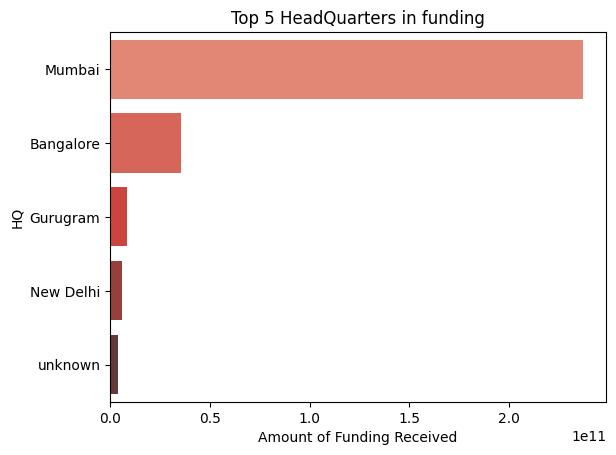

In [110]:
plt.title('Top 5 HeadQuarters in funding')
sns.barplot(y=top_5_HQ['HeadQuarter'],x=top_5_HQ['Amount($)'],palette='Reds_d')
plt.ylabel('HQ')
plt.xlabel('Amount of Funding Received')
plt.show()

Mumbai ,Bangalore and Gurugram 

In [111]:
#The collective funding acquired by companies across various cities or regions varies. 
#Mumbai stands out as the leading location, securing the highest funding of $231.53 billion,
# followed by Bangalore with $24.52 billion. Additional locations, such as Gurugram, New Delhi, and California, 
#have also garnered diverse funding amounts.

#### 3. How many companies received funding in each year?

In [112]:
year =data.groupby(['Funding Year']).count().reset_index()
year

,Funding Year,Company Name,Industry,Stage,Amount($),HeadQuarter,category
0,2018,525,525,525,525,525,525
1,2019,89,89,89,89,89,89
2,2020,1048,1048,1048,1048,1048,1048
3,2021,1182,1182,1182,1182,1182,1182


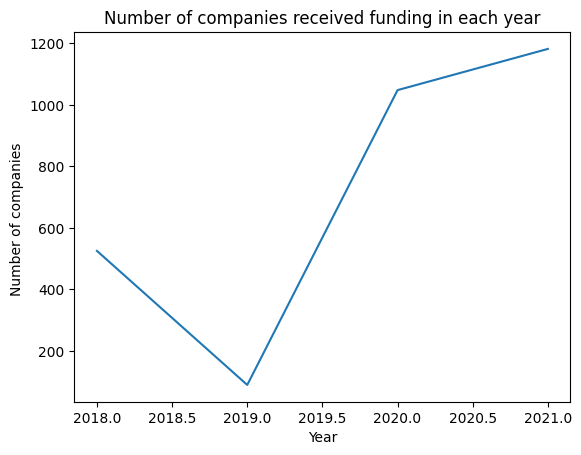

In [113]:
plt.xlabel('Year')
plt.ylabel('Number of companies ')
plt.title('Number of companies received funding in each year')
sns.lineplot(y=year['Company Name'],x=year['Funding Year'])

plt.show()

#### 4. What is the total amount  funding received each year

In [114]:
amtby_year=data.groupby(['Funding Year']).sum(numeric_only=True).reset_index()
amtby_year

,Funding Year,Amount($)
0,2018,6641523177.00
1,2019,3336433200.00
2,2020,118142316725.57
3,2021,190150284437.91


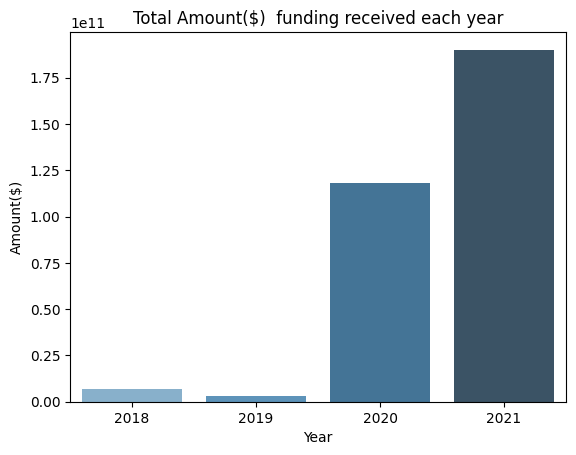

In [115]:
plt.title('Total Amount($)  funding received each year')
ax=sns.barplot(y=amtby_year['Amount($)'],x=amtby_year['Funding Year'],palette='Blues_d')
ax.set(xlabel='Year',ylabel='Amount($)')
plt.show()

#### 5. which company recieved the most funds

In [116]:
companies=data.groupby('Company Name')['Amount($)'].sum().reset_index()
companies.sort_values(['Amount($)'], ascending=False,inplace=True)
companies

,Company Name,Amount($)
70,Alteria Capital,150000000000.00
1554,Reliance Retail Ventures Ltd,70000000000.00
1724,Snowflake,3000000000.00
1551,Reliance,2200000000.00
1814,Swiggy,1956000000.00
...,...,...
1925,Try & Buy,0.00
181,Benepik,0.00
655,Finwego,0.00
1164,Medimetry,0.00


In [117]:
top5= companies.head()
top5

,Company Name,Amount($)
70,Alteria Capital,150000000000.00
1554,Reliance Retail Ventures Ltd,70000000000.00
1724,Snowflake,3000000000.00
1551,Reliance,2200000000.00
1814,Swiggy,1956000000.00


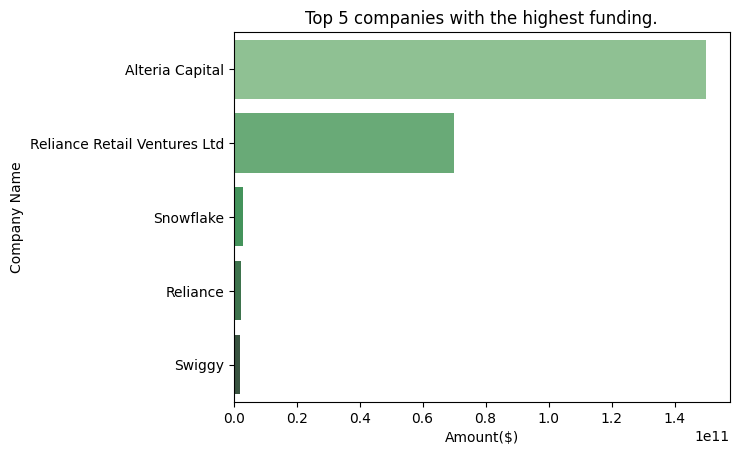

In [118]:

plt.title('Total Amount($) received funding each year')
sns.barplot(y=top5['Company Name'],x=top5['Amount($)'],palette='Greens_d')
ax.set(xlabel='Amount($)',ylabel='Companies')
plt.title('Top 5 companies with the highest funding.')
plt.show()

## Multivariate Analysis

Multivariate analysis involves the examination of multiple variables to explore and understand the relationships among them. This type of analysis often includes the calculation of statistical indicators such as correlation and the creation of various charts to visually represent these relationships.

For a more in-depth understanding of the charts used in multivariate data analysis, please refer to this [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) 

### What id the trend of funding received by top 5 Sectors from 2018 to 2021

In [119]:
HQ_sec=data.query("Industry==['EdTech','FinTech','Retail', 'Tech company','E-commerce']").groupby([
    'Funding Year','Industry'])['Amount($)'].sum(numeric_only=True).reset_index()
#HQ_sec.sort_values(['Funding Year'], ascending = True, inplace=True)
HQ_sec

,Funding Year,Industry,Amount($)
0,2018,EdTech,591914500.00
1,2018,FinTech,17600000.00
2,2018,Retail,37680000.00
3,2019,E-commerce,288000000.00
4,2020,E-commerce,1709244914.97
5,2020,EdTech,2090335829.93
6,2020,FinTech,2129205829.93
7,2020,Retail,70239400000.00
8,2020,Tech company,3246518957.48
9,2021,E-commerce,1441354478.74


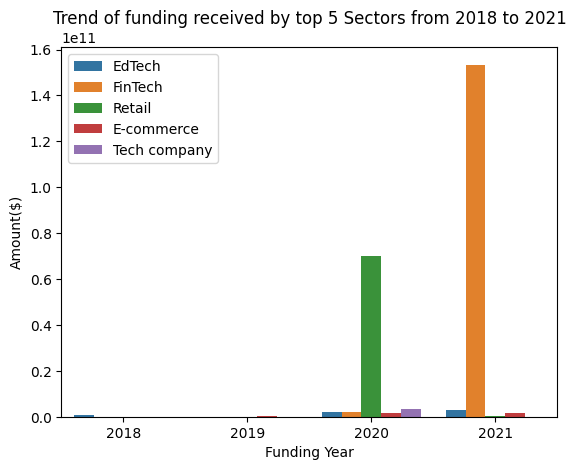

In [120]:
sns.barplot(x=HQ_sec['Funding Year'],y=HQ_sec['Amount($)'],hue=HQ_sec['Industry'])
plt.title('Trend of funding received by top 5 Sectors from 2018 to 2021')
plt.legend(loc='upper left')

Companies across different sectors secured funding during the years 2018, 2019, 2020, and 2021. Notably, the EdTech sector obtained funding in 2018 and 2019, amounting to $591.91 million and $736.18 million, respectively. The FinTech sector, on the other hand, received funding in 2018, 2020, and 2021, with varying amounts. In 2019, 2020, and 2021, the E-commerce sector secured funding of $1.26 billion, $1.33 billion, and $1.32 billion, respectively. The Retail sector received funding in 2018, 2020, and 2021, with fluctuating amounts. Additionally, Tech Companies obtained funding exclusively in 2020. Notably, the FinTech sector recorded the highest funding amount in 2021, reaching $152.61 billion.

### What is the trend of funding reveived by top 5 HeadQuarters from 2018 to 2021

In [121]:
top_5_HQ_visual=data.query("HeadQuarter==['Mumbai','Bangalore','Gurugram', 'New Delhi','California']").groupby([
    'HeadQuarter','Funding Year']).sum(numeric_only=True).reset_index()
top_5_HQ_visual.sort_values(['Funding Year'], ascending = True, inplace=True)
top_5_HQ_visual

,HeadQuarter,Funding Year,Amount($)
0,Bangalore,2018,2304590046.00
8,Mumbai,2018,1842373200.00
12,New Delhi,2018,464194040.00
1,Bangalore,2019,824900000.00
5,Gurugram,2019,785200000.00
9,Mumbai,2019,372500000.00
13,New Delhi,2019,5000000.00
2,Bangalore,2020,13187331827.38
4,California,2020,3190209478.74
6,Gurugram,2020,2027279202.38


Text(0.5, 1.0, 'Trend of funding received by top 5 HeadQuarter from 2018 to 2021')

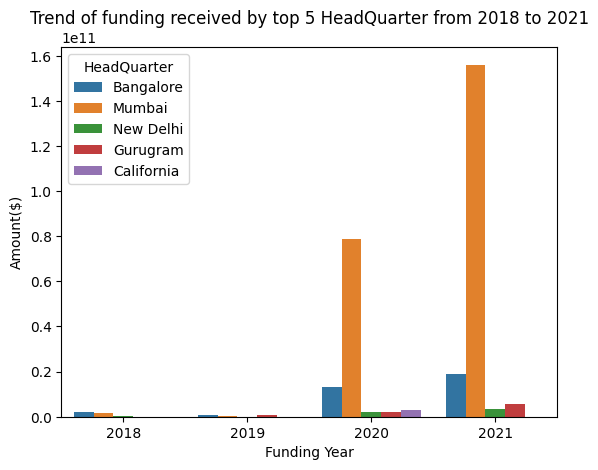

In [122]:
sns.barplot(x=top_5_HQ_visual['Funding Year'],y=top_5_HQ_visual['Amount($)'],hue=top_5_HQ_visual['HeadQuarter'])
plt.title('Trend of funding received by top 5 HeadQuarter from 2018 to 2021')

The funding received by companies headquartered in different cities in India and California in the years 2018, 2019, 2020, and 2021. Bangalore received the highest funding in 2021, with $15.74 billion, followed by Mumbai with $154.14 billion, and California with $3.08 billion in the same year. In 2020, Mumbai received the highest funding amounting to $75.17 billion, followed by Bangalore with $5.64 billion. In 2019, Bangalore received the highest funding with $824.9 million. And in 2018, Bangalore received the highest funding with $2.3 billion. Gurugram, New Delhi, and Mumbai also received funding in various years.

## Testing hypothesis

 Hypothesis : Sector and Funding Amount

* Null Hypothesis (H0): The sector in which a startup operates has no significant impact on the amount of funding it receives.   
*  Alternative Hypothesis (H1): The sector in which a startup operates has a significant impact on the amount of funding it receives.  

In [123]:
data.head(15)

,Company Name,Industry,Stage,Amount($),HeadQuarter,Funding Year,category
0,TheCollegeFever,Brand Marketing,Early Stage,250000.00,Bangalore,2018,E-Commerce & Marketplace
1,Happy Cow Dairy,Agriculture,Early Stage,584000.00,Mumbai,2018,Food & Agriculture
2,MyLoanCare,Credit,Series A to Series H,949000.00,Gurgaon,2018,Finance $ Banking
3,PayMe India,Financial Services,Angel and Grants,2000000.00,Noida,2018,Consulting & Services
4,Eunimart,E-Commerce Platforms,Early Stage,0.00,Hyderabad,2018,E-Commerce & Marketplace
5,Hasura,Cloud Infrastructure,Early Stage,1600000.00,Bengaluru,2018,Other
6,Tripshelf,Internet,Early Stage,233600.00,Kalkaji,2018,Technology
7,Hyperdata.IO,Market Research,Angel and Grants,730000.00,Hyderabad,2018,E-Commerce & Marketplace
8,Freightwalla,Information Services,Early Stage,0.00,Mumbai,2018,Consulting & Services
9,Microchip Payments,Mobile Payments,Early Stage,0.00,Bangalore,2018,Other


In [135]:
# Filter data for each location
industry_a_funding = data[data['Industry'] == 'Agriculture']['Amount($)']
industry_funding = data[data['Industry'] == 'Child Care']['Amount($)']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(location_a_funding, location_b_funding, equal_var=False)

# Set significance level (alpha)
alpha = 0.05

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Industry of the startup affects the funding")
else:
    print("Fail to reject Null Hypothesis (H0): Industry of the startup does not affect the funding")


T-statistic: 1.4229882359328372
P-value: 0.15540864377375635
Fail to reject Null Hypothesis (H0): Industry of the startup does not affect the funding


In [126]:

data.to_csv("startup_funding_dataset.csv", index=False)


In [134]:
# Assuming 'df' is your DataFrame
df_numerized = df.copy()  # Create a copy to avoid modifying the original DataFrame

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object' and col_name != 'name':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# df_numerized now contains numerized values for string columns excluding 'name'
print(df_numerized)

      Company Name  Industry  Stage   Amount($)  HeadQuarter  Funding Year  \
0             1872        97      1   250000.00            9          2018   
1              817        33      1   584000.00           71          2018   
2             1234       166      3   949000.00           39          2018   
3             1382       269      0  2000000.00           77          2018   
4              587       211      1        0.00           44          2018   
...            ...       ...    ...         ...          ...           ...   
2839           755       527      1  3000000.00           40          2021   
2840          1983       276      3 20000000.00           74          2021   
2841          1060       269      3 55000000.00            9          2021   
2842           377       225      3 26000000.00           40          2021   
2843          2050       269      3  8000000.00            9          2021   

      category  
0            2  
1            4  
2           

<function matplotlib.pyplot.show(close=None, block=None)>

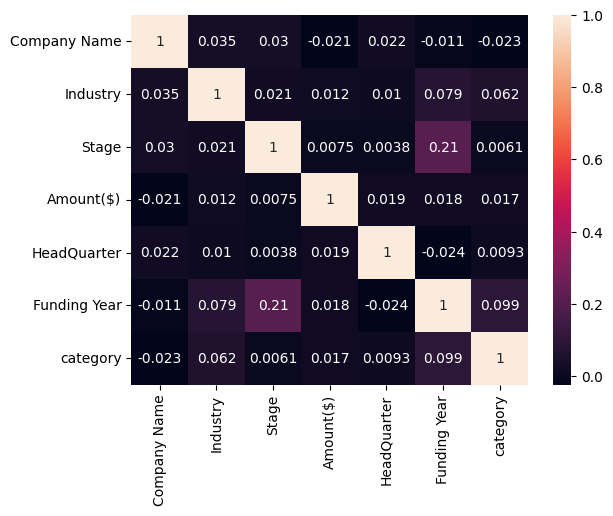

In [129]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix,annot=True)
plt.show

### Conclusion 

By utilizing a correlation matrix and heatmap analysis, it is evident that there is no discernible relationship between the columns. This implies a lack of correlation among the variables under consideration. As a data analyst, this finding suggests that the variables are likely independent of each other, reinforcing the notion that changes in one variable do not systematically correspond with changes in another. This insight is crucial for making informed decisions and drawing accurate conclusions from the dataset.